# Class:        EML6281 
## Assignement: Exam 1
### Name:       Elias Reyes

===========================================================================

In [1]:
# import libraries
import numpy as np
from math import cos
from math import sin
from math import pi
from numpy import square as sqr
import math

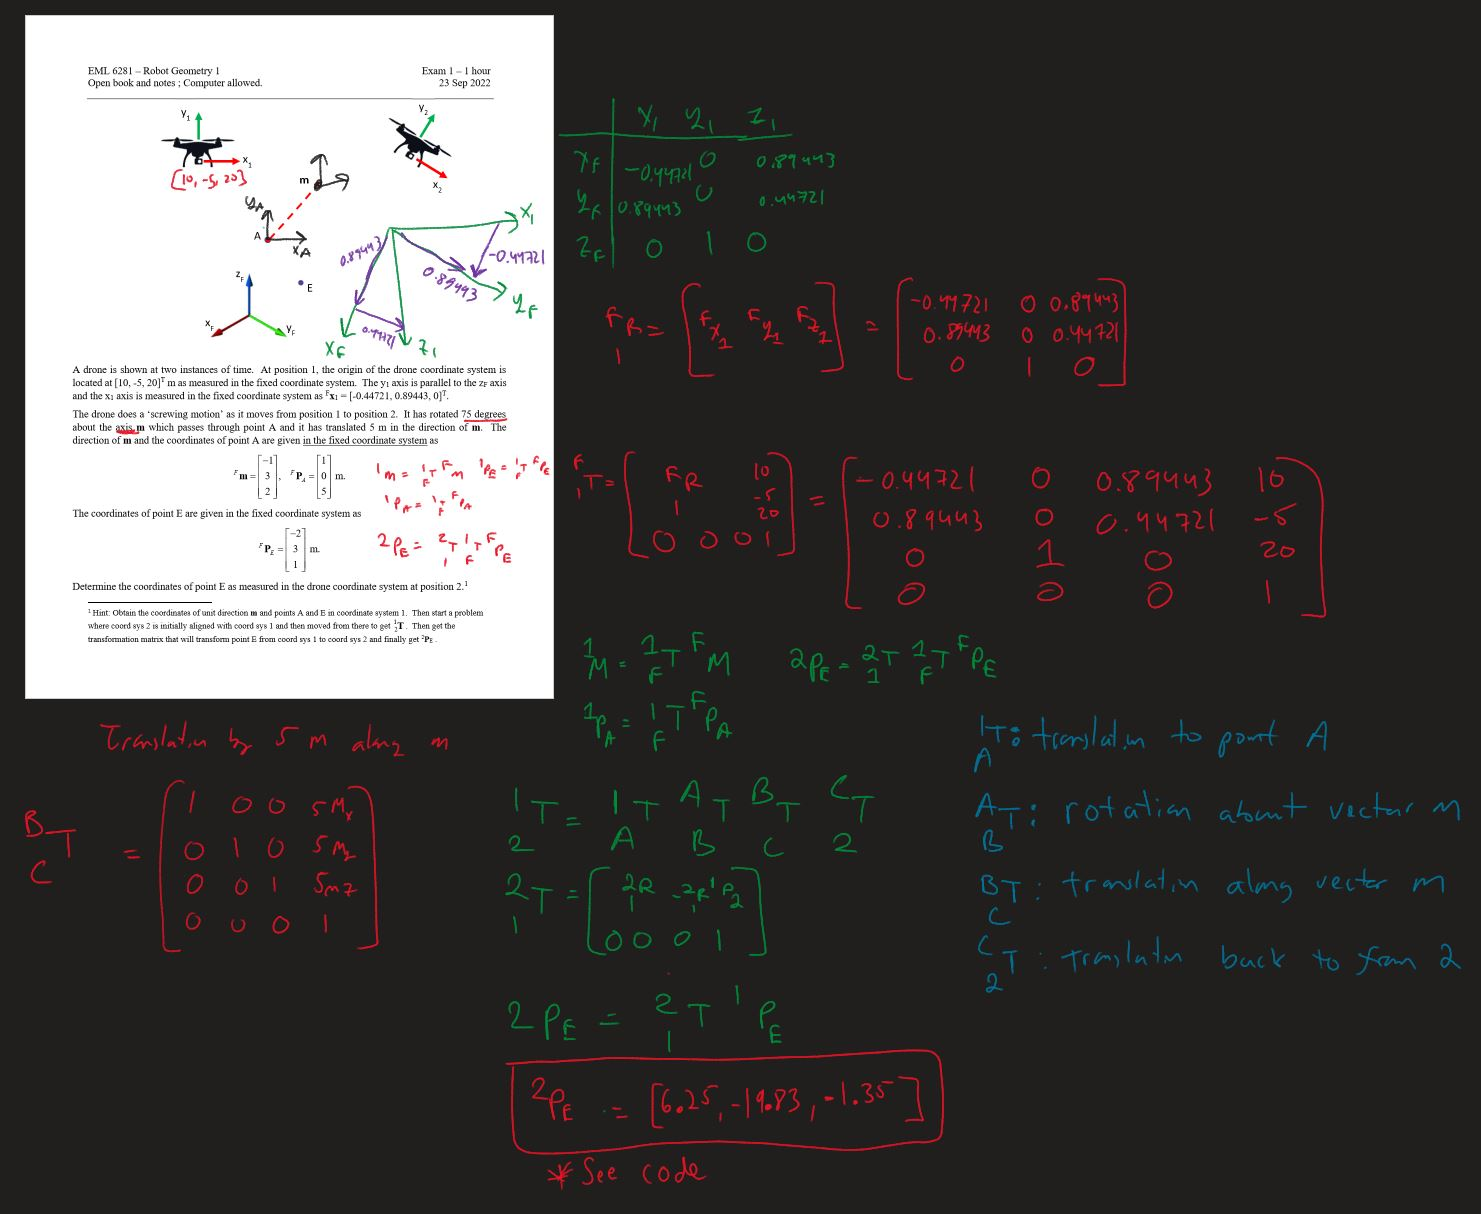

In [2]:
from IPython.display import Image

Image('exam1.JPG', width=700)

In [3]:
# define local functions
def get_reverse_transformation(T):
    
    # setting A_T_B is arbitrary, all that matters is the input and output are correct
    A_T_B  =  np.matrix(T)
    A_P_B0 = A_T_B[0:-1,-1]
    B_R_A  = A_T_B[0:3,0:3].transpose()
    B_T_A  = np.concatenate((np.concatenate((B_R_A,-B_R_A*A_P_B0),axis=1),
                             [[0, 0, 0, 1]]),axis=0)

    return B_T_A

def translate_system(P):
    
    if len(P) == 4:
        P = P[0:-1]
        
    if P.shape == (3,):
        P = np.array([P]).T
        
    idenity    = np.identity(3)
    translated = np.concatenate((np.concatenate((idenity,P),axis=1),[[0,0,0,1]]),axis=0)

    return translated

def build_transformation_from_axis_and_angle_of_rotation(m,theta):
    
    m = np.array(m)

    m_hat = m / np.linalg.norm(m)

    mx = m_hat[0]
    my = m_hat[1]
    mz = m_hat[2]

    # convert theta to radians
    theta = theta*math.pi/180
    # term for simplification
    v = 1 - cos(theta)
    # transformation to A from B
    A_R_B = np.array([[sqr(mx)*v + cos(theta), mx*my*v-mz*sin(theta), mx*mz*v+my*sin(theta)],
                      [mx*my*v+mz*sin(theta), sqr(my)*v + cos(theta), my*mz*v-mx*sin(theta)],
                      [mx*mz*v-my*sin(theta), my*mz*v + mx*sin(theta), sqr(mz)*v+cos(theta)]])
  
    A_R_B = np.reshape(A_R_B,(3,3))
    P     = np.array([[0,0,0]]).T
    
    T = np.concatenate((np.concatenate((A_R_B,P),axis=1),[[0,0,0,1]]),axis=0)

    return T

In [4]:
# Given coordinates in fixed frame
m_wrt_F  = np.array([[-1,3,2]]).T
PA_wrt_F = np.array([[1, 0, 5,1]]).T
PE_wrt_F = np.array([[-2, 3, 1,1]]).T

# unitize m vector
m_hat_wrt_F = m_wrt_F / np.linalg.norm(m_wrt_F)

In [5]:
# create transformation between fixed and frame 1
x1_wrt_F = np.array([[-0.44721, 0.89443, 0]]).T # given
y1_wrt_F = np.array([[0, 0, 1]]).T              # given
z1_wrt_F = np.array([[0.89443, 0.44721, 0]]).T  # see diagram
P1_wrt_F = np.array([[10, -5, 20]]).T           # given
T_1toF   = np.concatenate((np.concatenate((x1_wrt_F,y1_wrt_F,z1_wrt_F,P1_wrt_F),
                                          axis=1),np.array([[0, 0, 0, 1]])),axis=0)
print('T_1toF:\n',T_1toF)

T_1toF:
 [[-0.44721  0.       0.89443 10.     ]
 [ 0.89443  0.       0.44721 -5.     ]
 [ 0.       1.       0.      20.     ]
 [ 0.       0.       0.       1.     ]]


In [6]:
# get reverse transformation
T_Fto1 =  get_reverse_transformation(T_1toF)
R_Fto1 = T_Fto1[0:3,0:3]
print('T_Fto1:\n',T_Fto1)
print('R_Fto1:\n',R_Fto1)

T_Fto1:
 [[ -0.44721   0.89443   0.        8.94425]
 [  0.        0.        1.      -20.     ]
 [  0.89443   0.44721   0.       -6.70825]
 [  0.        0.        0.        1.     ]]
R_Fto1:
 [[-0.44721  0.89443  0.     ]
 [ 0.       0.       1.     ]
 [ 0.89443  0.44721  0.     ]]


In [7]:
# get coordinates in position 1 frame
m_wrt_1  = R_Fto1@m_wrt_F
PA_wrt_1 = T_Fto1@PA_wrt_F
PE_wrt_1 = T_Fto1@PE_wrt_F
m_hat_wrt_1 = R_Fto1@m_hat_wrt_F
print('m_wrt_1:\n',m_wrt_1)
print('PA_wrt_1:\n',PA_wrt_1)
print('PE_wrt_1:\n',PE_wrt_1)
print('m_hat_wrt_1:\n',m_hat_wrt_1)

m_wrt_1:
 [[3.1305]
 [2.    ]
 [0.4472]]
PA_wrt_1:
 [[  8.49704]
 [-15.     ]
 [ -5.81382]
 [  1.     ]]
PE_wrt_1:
 [[ 12.52196]
 [-19.     ]
 [ -7.15548]
 [  1.     ]]
m_hat_wrt_1:
 [[0.83666132]
 [0.53452248]
 [0.11951923]]


In [8]:
# translate to a frame centered at point A
T_Ato1 = translate_system(PA_wrt_1)
# once centered at point A, need to rotate 75 degrees about m. 
# Note: m is unitized inside function
T_BtoA = build_transformation_from_axis_and_angle_of_rotation(m_wrt_1,75)
# once rotated, need to translate 5m along unit vector m
T_CtoB = translate_system(5*m_hat_wrt_1)
# once tranlated 5 m, need to translate back to to frame 2
T_2toC = translate_system(-PA_wrt_1)

print('T_Ato1:\n',T_Ato1)
print('T_BtoA:\n',T_BtoA)
print('T_CtoB:\n',T_CtoB)
print('T_2toC:\n',T_2toC)

T_Ato1:
 [[  1.        0.        0.        8.49704]
 [  0.        1.        0.      -15.     ]
 [  0.        0.        1.       -5.81382]
 [  0.        0.        0.        1.     ]]
T_BtoA:
 [[ 0.77764664  0.21601965  0.5904246   0.        ]
 [ 0.44691292  0.47058476 -0.76080144  0.        ]
 [-0.44219288  0.85550307  0.26940669  0.        ]
 [ 0.          0.          0.          1.        ]]
T_CtoB:
 [[1.         0.         0.         4.18330659]
 [0.         1.         0.         2.67261242]
 [0.         0.         1.         0.59759614]
 [0.         0.         0.         1.        ]]
T_2toC:
 [[ 1.       0.       0.      -8.49704]
 [ 0.       1.       0.      15.     ]
 [ 0.       0.       1.       5.81382]
 [ 0.       0.       0.       1.     ]]


In [9]:
# now mutliply transformations to get T_2to1
T_2to1 = T_Ato1@T_BtoA@T_CtoB@T_2toC 
print('T_2to1:\n',T_2to1)

T_2to1:
 [[  0.77764664   0.21601965   0.5904246   12.74556902]
 [  0.44691292   0.47058476  -0.76080144 -13.48921576]
 [ -0.44219288   0.85550307   0.26940669  12.93993468]
 [  0.           0.           0.           1.        ]]


In [10]:
# Solve for PE_wrt_2 
# NOTE: PE_wrt_2 = T_1to2 * PE_wrt_1 (need to get reverse transformation of T_2to1)
T_1to2 = get_reverse_transformation(T_2to1)
PE_wrt_2 = T_1to2@PE_wrt_1
print('T_1to2:\n',T_1to2)
print('PE_wrt_1:\n',PE_wrt_1)

T_1to2:
 [[  0.77764664   0.44691292  -0.44219288   1.83890272]
 [  0.21601965   0.47058476   0.85550307  -7.4756278 ]
 [  0.5904246   -0.76080144   0.26940669 -21.27401717]
 [  0.           0.           0.           1.        ]]
PE_wrt_1:
 [[ 12.52196]
 [-19.     ]
 [ -7.15548]
 [  1.     ]]


In [11]:
print('PE_wrt_2:\n',PE_wrt_2)

PE_wrt_2:
 [[  6.24931977]
 [-19.83328389]
 [ -1.35325078]
 [  1.        ]]
